In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
import h5py

In [2]:
with open('g_actual', 'rb') as f:
    g_actual = pickle.load(f)
with open('y_hat', 'rb') as f:
    y_hat = pickle.load(f)
with open('g_hat', 'rb') as f:
    g_hat = pickle.load(f)

Text(0, 0.5, 'Gain value')

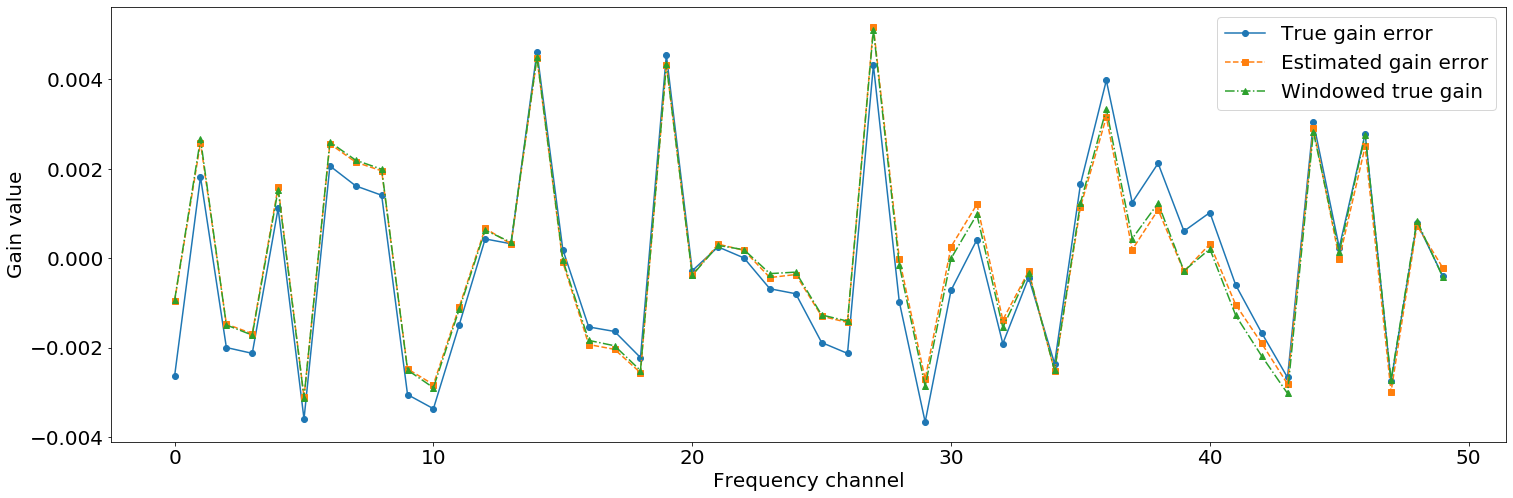

In [3]:
plt.figure(figsize = (25, 8))
plt.rcParams.update({'font.size': 20})
plt.plot(g_actual, '-o', label = "True gain error")
plt.plot(y_hat, '--s', label = "Estimated gain error")
plt.plot(g_hat, '-.^', label = "Windowed true gain")
#plt.title("True error and the estimated error", fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Frequency channel", fontsize=20)
plt.ylabel("Gain value", fontsize=20)
#plt.savefig("test_bp_gain_err_three", pad_inches = 0.01)

In [4]:
with open('true_HI', 'rb') as f:
    true_HI = pickle.load(f)
with open('true_FG', 'rb') as f:
    true_FG = pickle.load(f)
with open('cleaned_HI', 'rb') as f:
    cleaned_HI = pickle.load(f)
with open('uncleaned_HI', 'rb') as f:
    uncleaned_HI = pickle.load(f)  

<Figure size 1800x360 with 0 Axes>

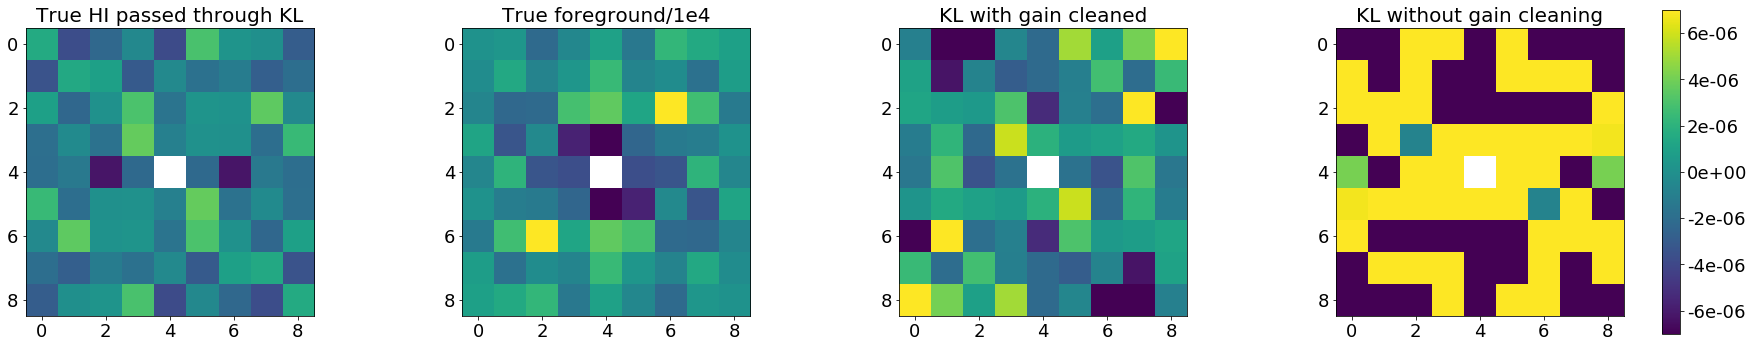

In [5]:
plt.figure(figsize = (25,5))
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
fig.subplots_adjust(top = 0.90, bottom = 0.1, right = 0.94, left = 0.01, hspace = 0.01)
axes[0].imshow(true_HI, vmin=-7e-6, vmax=7e-6)
#plt.colorbar(format='%.0e')
#axes[0].set_clim(-7e-6, 7e-6)
axes[0].set_title("True HI passed through KL", fontsize = 20)
axes[1].imshow(true_FG/1e4, vmin=-7e-6, vmax=7e-6)
#plt.colorbar(format='%.0e')
#axes[1].clim(-7e-6, 7e-6)
axes[1].set_title("True foreground/1e4", fontsize = 20)
axes[2].imshow(cleaned_HI, vmin=-7e-6, vmax=7e-6)
#plt.colorbar(format='%.0e')
#axes[2].clim(-7e-6, 7e-6)
axes[2].set_title("KL with gain cleaned", fontsize = 20)
im = axes[3].imshow(uncleaned_HI, vmin=-7e-6, vmax=7e-6)
#axes[3].clim(-7e-6, 7e-6)
axes[3].set_title("KL without gain cleaning", fontsize = 20)
cbar_ax = fig.add_axes([0.94, 0.05, 0.01, 0.9])
fig.colorbar(im,format='%.0e',cax=cbar_ax)
#plt.savefig("test_first_case_vis_plot_1e_3")

In [6]:
truecl = '/home/hcwang96/foreground_project/HI_Cl.hdf5'# file name for the realistic power spectrum
Fcl = h5py.File(truecl, 'r')
ell = Fcl['ell'][...]
cl = np.mean(Fcl['cl'][...], axis = 0)

In [7]:
with open('test_first_cleaned_mean_1e-5', 'rb') as f:
    cleaned_mean_1e_5 = pickle.load(f)
with open('test_first_cleaned_std_1e-5', 'rb') as f:
    cleaned_std_1e_5 = pickle.load(f)
with open('test_first_uncleaned_mean_1e-5', 'rb') as f:
    uncleaned_mean_1e_5 = pickle.load(f)
with open('test_first_uncleaned_std_1e-5', 'rb') as f:
    uncleaned_std_1e_5 = pickle.load(f)
    
with open('test_first_cleaned_mean_1e-4', 'rb') as f:
    cleaned_mean_1e_4 = pickle.load(f)
with open('test_first_cleaned_std_1e-4', 'rb') as f:
    cleaned_std_1e_4 = pickle.load(f)
with open('test_first_uncleaned_mean_1e-4', 'rb') as f:
    uncleaned_mean_1e_4 = pickle.load(f)
with open('test_first_uncleaned_std_1e-4', 'rb') as f:
    uncleaned_std_1e_4 = pickle.load(f)

with open('test_first_cleaned_mean_1e-3', 'rb') as f:
    cleaned_mean_1e_3 = pickle.load(f)
with open('test_first_cleaned_std_1e-3', 'rb') as f:
    cleaned_std_1e_3 = pickle.load(f)
with open('test_first_uncleaned_mean_1e-3', 'rb') as f:
    uncleaned_mean_1e_3 = pickle.load(f)
with open('test_first_uncleaned_std_1e-3', 'rb') as f:
    uncleaned_std_1e_3 = pickle.load(f)
    
    
with open('test_bc_new', 'rb') as f:
    bc = pickle.load(f)

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1e-13, 1e-08)

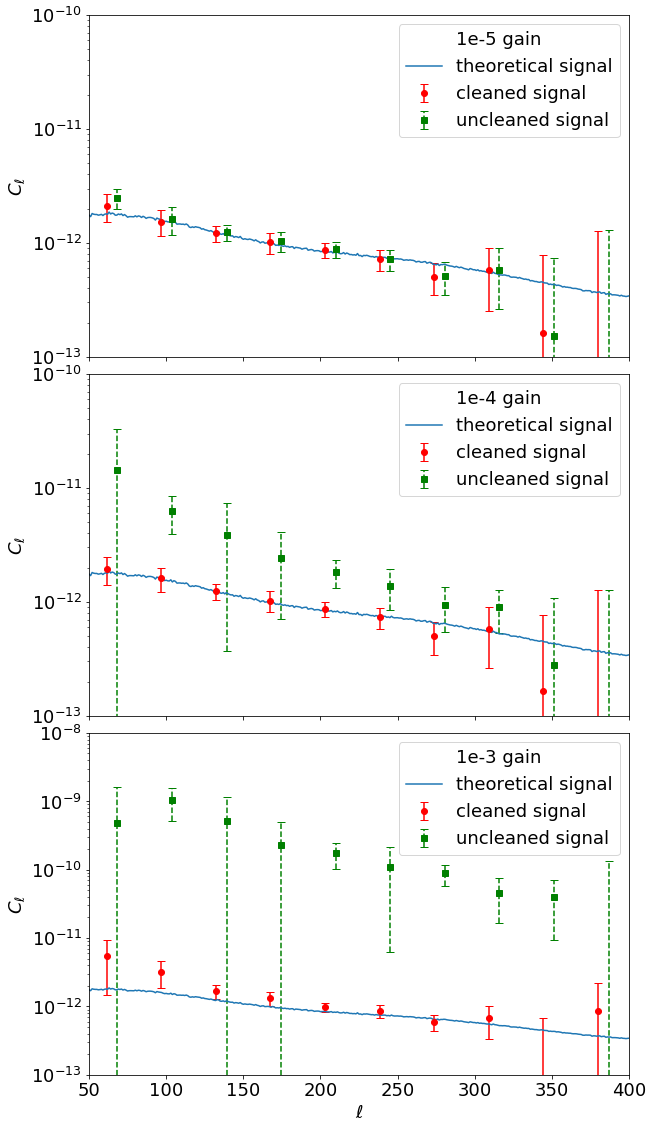

In [8]:

plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10,16))
fig.subplots_adjust(top = 0.97, bottom = 0.05, right = 0.9, left = 0.15, 
            hspace = 0.05)


eb0 = ax[0].errorbar(bc, cleaned_mean_1e_5, yerr=cleaned_std_1e_5, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb1 = ax[0].errorbar(bc+7, uncleaned_mean_1e_5, yerr=uncleaned_std_1e_5, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb1[-1][0].set_linestyle('--')
th, = ax[0].plot(ell, cl)
gp, = ax[0].plot([], [], ' ')

ax[0].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[0].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[0].legend([gp, th, eb0, eb1], ("1e-5 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[0].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[0].set_ylim([1e-13, 1e-10])


eb02 = ax[1].errorbar(bc, cleaned_mean_1e_4, yerr=cleaned_std_1e_4, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb2 = ax[1].errorbar(bc+7, uncleaned_mean_1e_4, yerr=uncleaned_std_1e_4, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb2[-1][0].set_linestyle('--')
th2, = ax[1].plot(ell, cl, label = 'theoretical signal')
gp2, = ax[1].plot([], [], ' ', label="1e-4 gain")
ax[1].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[1].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[1].legend([gp2, th2, eb02, eb2], ("1e-4 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[1].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[1].set_ylim([1e-13, 1e-10])

eb03 = ax[2].errorbar(bc, cleaned_mean_1e_3, yerr=cleaned_std_1e_3, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb3 = ax[2].errorbar(bc+7, uncleaned_mean_1e_3, yerr=uncleaned_std_1e_3, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb3[-1][0].set_linestyle('--')
th3, = ax[2].plot(ell, cl, label = 'theoretical signal')
gp3, = ax[2].plot([], [], ' ', label="1e-3 gain")
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[2].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[2].legend([gp3, th3, eb03, eb3], ("1e-3 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[2].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[2].set_ylim([1e-13, 1e-8])

#plt.savefig("test_first_case_ver")

In [9]:
with open('test_second_cleaned_mean_1e-5_15_15', 'rb') as f:
    cleaned_mean_1e_5 = pickle.load(f)
with open('test_second_cleaned_std_1e-5_15_15', 'rb') as f:
    cleaned_std_1e_5 = pickle.load(f)
with open('test_second_uncleaned_mean_1e-5_15_15', 'rb') as f:
    uncleaned_mean_1e_5 = pickle.load(f)
with open('test_second_uncleaned_std_1e-5_15_15', 'rb') as f:
    uncleaned_std_1e_5 = pickle.load(f)
    
with open('test_second_cleaned_mean_1e-4_15_15', 'rb') as f:
    cleaned_mean_1e_4 = pickle.load(f)
with open('test_second_cleaned_std_1e-4_15_15', 'rb') as f:
    cleaned_std_1e_4 = pickle.load(f)
with open('test_second_uncleaned_mean_1e-4_15_15', 'rb') as f:
    uncleaned_mean_1e_4 = pickle.load(f)
with open('test_second_uncleaned_std_1e-4_15_15', 'rb') as f:
    uncleaned_std_1e_4 = pickle.load(f)

with open('test_second_cleaned_mean_1e-3_15_15', 'rb') as f:
    cleaned_mean_1e_3 = pickle.load(f)
with open('test_second_cleaned_std_1e-3_15_15', 'rb') as f:
    cleaned_std_1e_3 = pickle.load(f)
with open('test_second_uncleaned_mean_1e-3_15_15', 'rb') as f:
    uncleaned_mean_1e_3 = pickle.load(f)
with open('test_second_uncleaned_std_1e-3_15_15', 'rb') as f:
    uncleaned_std_1e_3 = pickle.load(f)

(1e-13, 1e-08)

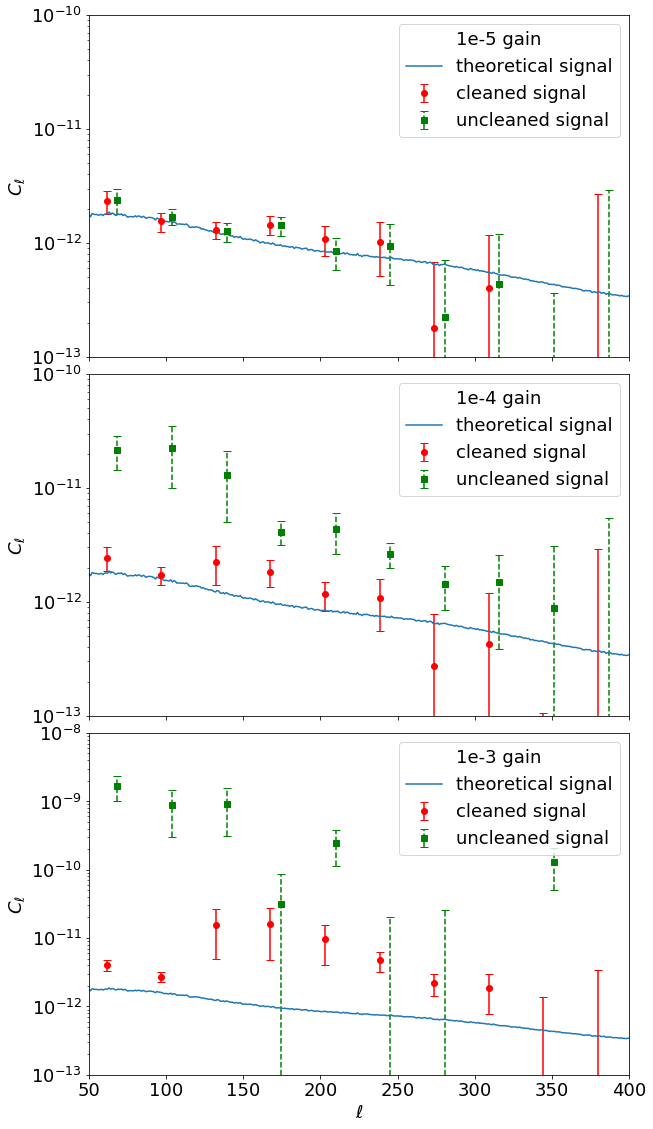

In [10]:

plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10,16))
fig.subplots_adjust(top = 0.97, bottom = 0.05, right = 0.9, left = 0.15, 
            hspace = 0.05)


eb0 = ax[0].errorbar(bc, cleaned_mean_1e_5, yerr=cleaned_std_1e_5, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb1 = ax[0].errorbar(bc+7, uncleaned_mean_1e_5, yerr=uncleaned_std_1e_5, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb1[-1][0].set_linestyle('--')
th, = ax[0].plot(ell, cl)
gp, = ax[0].plot([], [], ' ')

ax[0].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[0].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[0].legend([gp, th, eb0, eb1], ("1e-5 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[0].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[0].set_ylim([1e-13, 1e-10])


eb02 = ax[1].errorbar(bc, cleaned_mean_1e_4, yerr=cleaned_std_1e_4, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb2 = ax[1].errorbar(bc+7, uncleaned_mean_1e_4, yerr=uncleaned_std_1e_4, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb2[-1][0].set_linestyle('--')
th2, = ax[1].plot(ell, cl, label = 'theoretical signal')
gp2, = ax[1].plot([], [], ' ', label="1e-4 gain")
ax[1].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[1].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[1].legend([gp2, th2, eb02, eb2], ("1e-4 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[1].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[1].set_ylim([1e-13, 1e-10])

eb03 = ax[2].errorbar(bc, cleaned_mean_1e_3, yerr=cleaned_std_1e_3, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb3 = ax[2].errorbar(bc+7, uncleaned_mean_1e_3, yerr=uncleaned_std_1e_3, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb3[-1][0].set_linestyle('--')
th3, = ax[2].plot(ell, cl, label = 'theoretical signal')
gp3, = ax[2].plot([], [], ' ', label="1e-3 gain")
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[2].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[2].legend([gp3, th3, eb03, eb3], ("1e-3 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[2].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[2].set_ylim([1e-13, 1e-8])

#plt.savefig("test_second_case_15_ver")

In [21]:
with open('test_third_cleaned_mean_1e-5', 'rb') as f:
    cleaned_mean_1e_5 = pickle.load(f)
with open('test_third_cleaned_std_1e-5', 'rb') as f:
    cleaned_std_1e_5 = pickle.load(f)
with open('test_third_uncleaned_mean_1e-5', 'rb') as f:
    uncleaned_mean_1e_5 = pickle.load(f)
with open('test_third_uncleaned_std_1e-5', 'rb') as f:
    uncleaned_std_1e_5 = pickle.load(f)
    
with open('test_third_cleaned_mean_1e-4', 'rb') as f:
    cleaned_mean_1e_4 = pickle.load(f)
with open('test_third_cleaned_std_1e-4', 'rb') as f:
    cleaned_std_1e_4 = pickle.load(f)
with open('test_third_uncleaned_mean_1e-4', 'rb') as f:
    uncleaned_mean_1e_4 = pickle.load(f)
with open('test_third_uncleaned_std_1e-4', 'rb') as f:
    uncleaned_std_1e_4 = pickle.load(f)

with open('test_third_cleaned_mean_1e-3', 'rb') as f:
    cleaned_mean_1e_3 = pickle.load(f)
with open('test_third_cleaned_std_1e-3', 'rb') as f:
    cleaned_std_1e_3 = pickle.load(f)
with open('test_third_uncleaned_mean_1e-3', 'rb') as f:
    uncleaned_mean_1e_3 = pickle.load(f)
with open('test_third_uncleaned_std_1e-3', 'rb') as f:
    uncleaned_std_1e_3 = pickle.load(f)

(1e-13, 1e-08)

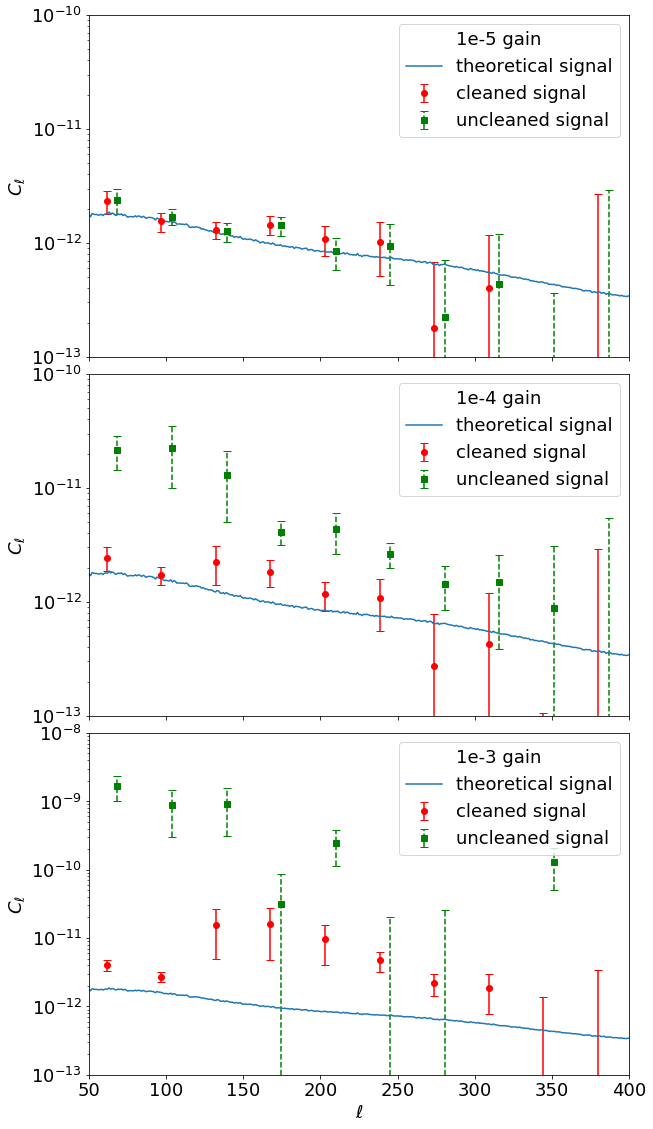

In [11]:

plt.rcParams.update({'font.size': 18})


fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10,16))
fig.subplots_adjust(top = 0.97, bottom = 0.05, right = 0.9, left = 0.15, 
            hspace = 0.05)


eb0 = ax[0].errorbar(bc, cleaned_mean_1e_5, yerr=cleaned_std_1e_5, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb1 = ax[0].errorbar(bc+7, uncleaned_mean_1e_5, yerr=uncleaned_std_1e_5, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb1[-1][0].set_linestyle('--')
th, = ax[0].plot(ell, cl)
gp, = ax[0].plot([], [], ' ')

ax[0].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[0].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[0].legend([gp, th, eb0, eb1], ("1e-5 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[0].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[0].set_ylim([1e-13, 1e-10])


eb02 = ax[1].errorbar(bc, cleaned_mean_1e_4, yerr=cleaned_std_1e_4, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb2 = ax[1].errorbar(bc+7, uncleaned_mean_1e_4, yerr=uncleaned_std_1e_4, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb2[-1][0].set_linestyle('--')
th2, = ax[1].plot(ell, cl, label = 'theoretical signal')
gp2, = ax[1].plot([], [], ' ', label="1e-4 gain")
ax[1].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[1].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[1].legend([gp2, th2, eb02, eb2], ("1e-4 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[1].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[1].set_ylim([1e-13, 1e-10])

eb03 = ax[2].errorbar(bc, cleaned_mean_1e_3, yerr=cleaned_std_1e_3, fmt='o', capsize = 4, ecolor='r', color ='r', label ="cleaned signal")
eb3 = ax[2].errorbar(bc+7, uncleaned_mean_1e_3, yerr=uncleaned_std_1e_3, fmt='s', capsize = 4, ecolor='g', color ='g', label = "uncleaned signal" )
eb3[-1][0].set_linestyle('--')
th3, = ax[2].plot(ell, cl, label = 'theoretical signal')
gp3, = ax[2].plot([], [], ' ', label="1e-3 gain")
ax[2].set_xlabel(r'$\ell$')
ax[2].set_ylabel(r'$C_{\ell}$')
#plt.xscale('log')
ax[2].set_yscale('log')
#plt.title("Signal cross correlated between two seasons, gain~1e-4")
ax[2].legend([gp3, th3, eb03, eb3], ("1e-3 gain", 'theoretical signal', "cleaned signal", "uncleaned signal"))
ax[2].set_xlim([50, 400])
#plt.ylim([-0.4e-11, 1.e-11])
ax[2].set_ylim([1e-13, 1e-8])

#plt.savefig("test_third_case_ver")